In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns 
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("D://bank-additional-full.csv")
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# checking for categorical values
categorical = [var for var in df.columns if df[var].dtype=='O'] #categorical values means features which contains string values

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 11 categorical variables

The categorical variables are :

 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
# now explore numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in numerical:
    print(col, check_outlier(df, col))

age True
duration True
campaign True
pdays True
previous True
emp.var.rate False
cons.price.idx False
cons.conf.idx True
euribor3m False
nr.employed False


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

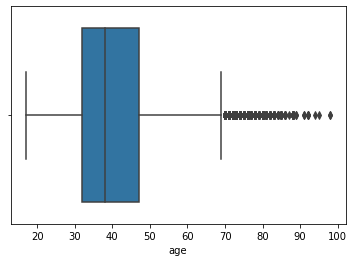

In [10]:
sns.boxplot(df["age"])

In [11]:
# Dropping the outlier data points
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

# for col in numerical:
#     print(col, remove_outlier(df, col).shape)

In [12]:
for col in ["age","duration","campaign","pdays","previous","cons.conf.idx"]:
    new_df = remove_outlier(df,col )

df.shape[0] - new_df.shape[0]

447

In [13]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in ["age","duration","campaign","pdays","previous","cons.conf.idx"]:
    replace_with_thresholds(df,col)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

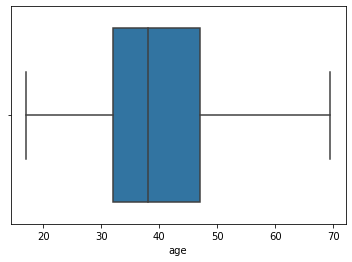

In [14]:
# We can see that all the outlier data points have gone
sns.boxplot(df["age"])

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
#checking for the frequency in the categorical values
for var in categorical: 
    
    print(df[var].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

In [17]:
#first of all replace unknown by null or NaN so that python can identify them
for var in categorical:

    df[var].replace('unknown', np.NaN, inplace=True)

In [18]:
#now again check for null values in categorical data
df[categorical].isnull().sum()

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

In [19]:
 # impute missing categorical variables with most frequent value
for col in ["job","marital","education","default","housing","loan"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
y              0
dtype: int64

In [21]:
Y = df.iloc[:,-1 ]
print("dependent =\n",Y)
X = df.iloc[:,:20]
print("Independent =\n",X)

dependent =
 0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object
Independent =
         age          job  marital            education default housing loan  \
0      56.0    housemaid  married             basic.4y      no      no   no   
1      57.0     services  married          high.school      no      no   no   
2      37.0     services  married          high.school      no     yes   no   
3      40.0       admin.  married             basic.6y      no      no   no   
4      56.0     services  married          high.school      no      no  yes   
...     ...          ...      ...                  ...     ...     ...  ...   
41183  69.5      retired  married  professional.course      no     yes   no   
41184  46.0  blue-collar  married  professional.course      no      no   no   
41185  56.0      retired  married    university.degree      no     yes   no   
4

In [22]:
print(X.shape)
print(Y.shape)

(41188, 20)
(41188,)


In [23]:
# encode remaining variables with one-hot encoding
# import category encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','poutcome'])

X = encoder.fit_transform(X)
print(X)

        age  job_1  job_2  job_3  job_4  job_5  job_6  job_7  job_8  job_9  \
0      56.0      1      0      0      0      0      0      0      0      0   
1      57.0      0      1      0      0      0      0      0      0      0   
2      37.0      0      1      0      0      0      0      0      0      0   
3      40.0      0      0      1      0      0      0      0      0      0   
4      56.0      0      1      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
41183  69.5      0      0      0      0      0      1      0      0      0   
41184  46.0      0      0      0      1      0      0      0      0      0   
41185  56.0      0      0      0      0      0      1      0      0      0   
41186  44.0      0      0      0      0      1      0      0      0      0   
41187  69.5      0      0      0      0      0      1      0      0      0   

       ...  pdays  previous  poutcome_1  poutcome_2  poutcome_3

In [24]:
# frequency count of target variable
count_class = pd.value_counts(df['y'])
print(count_class)

no     36548
yes     4640
Name: y, dtype: int64


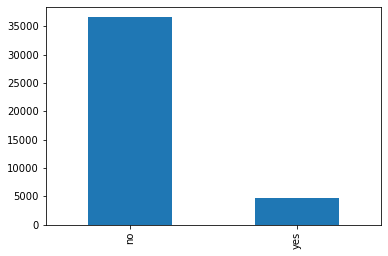

In [25]:
count_class.plot(kind='bar')
plt.xlabel = 'Class'
plt.ylabel = 'Frequency'

In [26]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(28831, 57) (12357, 57)
(28831,) (12357,)


In [27]:
import imblearn
from imblearn.over_sampling import SMOTE

x_train_new, x_test_new, y_train_new,y_test_new = train_test_split(x_train, y_train, test_size = 0.25, random_state=12)

In [28]:
print(x_train_new.shape, x_test_new.shape)
print(y_train_new.shape, y_test_new.shape)

(21623, 57) (7208, 57)
(21623,) (7208,)


In [29]:
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train_new, y_train_new)

In [30]:
from collections import Counter
Counter(y_train_res)

Counter({'no': 19157, 'yes': 19157})

In [31]:
x_test_res, y_test_res = sm.fit_resample(x_test_new, y_test_new)

In [32]:
Counter(y_test_res)

Counter({'no': 6423, 'yes': 6423})

In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


# check the shape of X_train and X_test
X_train.shape, X_test.shape

((32950, 57), (8238, 57))

In [34]:
#Feature Scaling
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,pdays,previous,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,...,32950.0,32950.0,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,2.815755e-16,3.823356e-15,8.581738e-16,1.762205e-15,-9.021952e-16,6.096051e-16,-1.380503e-15,-1.797584e-17,5.035207e-16,9.848470e-16,...,0.0,0.0,-8.100517e-16,1.886971e-15,1.557463e-16,-3.309138e-16,-1.600716e-14,-3.434481e-16,2.722287e-16,-1.635578e-14
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,0.0,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.256194e+00,-1.646806e-01,-3.266610e-01,-5.959751e-01,-5.372801e-01,-4.436583e-01,-2.081245e-01,-2.737436e-01,-1.581483e-01,-1.890505e-01,...,0.0,0.0,-2.524483e+00,-3.374769e-01,-1.858410e-01,-2.214472e+00,-2.375431e+00,-2.224939e+00,-1.722524e+00,-2.811715e+00
25%,-7.772068e-01,-1.646806e-01,-3.266610e-01,-5.959751e-01,-5.372801e-01,-4.436583e-01,-2.081245e-01,-2.737436e-01,-1.581483e-01,-1.890505e-01,...,0.0,0.0,3.961207e-01,-3.374769e-01,-1.858410e-01,-1.197044e+00,-8.658037e-01,-4.739871e-01,-1.313230e+00,-9.391048e-01
50%,-1.856118e-01,-1.646806e-01,-3.266610e-01,-5.959751e-01,-5.372801e-01,-4.436583e-01,-2.081245e-01,-2.737436e-01,-1.581483e-01,-1.890505e-01,...,0.0,0.0,3.961207e-01,-3.374769e-01,-1.858410e-01,6.470430e-01,2.983710e-01,-2.794369e-01,7.119080e-01,3.309532e-01
75%,7.017807e-01,-1.646806e-01,-3.266610e-01,1.677922e+00,-5.372801e-01,-4.436583e-01,-2.081245e-01,-2.737436e-01,-1.581483e-01,-1.890505e-01,...,0.0,0.0,3.961207e-01,-3.374769e-01,-1.858410e-01,8.378107e-01,7.215502e-01,8.878643e-01,7.718608e-01,8.436753e-01
max,2.920262e+00,6.072361e+00,3.061277e+00,1.677922e+00,1.861227e+00,2.253987e+00,4.804816e+00,3.653053e+00,6.323179e+00,5.289591e+00,...,0.0,0.0,3.961207e-01,2.963166e+00,5.380943e+00,8.378107e-01,2.056724e+00,2.930641e+00,8.202843e-01,8.436753e-01


In [35]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9122


In [36]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8933


In [37]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8866


In [38]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9086


In [39]:
#Compare the train-set and test-set accuracy

y_pred_train = linear_svc.predict(X_train)
y_pred_train

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [40]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9052
Test set score: 0.9086


In [41]:
# check class distribution in test set
y_test.value_counts()

no     7319
yes     919
Name: y, dtype: int64

In [42]:
#Run SVM with polynomial kernel
#Run SVM with polynomial kernel and C=1.0
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9090


In [43]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8866


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7192  127]
 [ 626  293]]

True Positives(TP) =  7192

True Negatives(TN) =  293

False Positives(FP) =  127

False Negatives(FN) =  626


<AxesSubplot:>

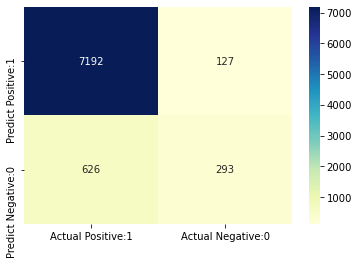

In [94]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7319
         yes       0.70      0.32      0.44       919

    accuracy                           0.91      8238
   macro avg       0.81      0.65      0.69      8238
weighted avg       0.90      0.91      0.89      8238



In [96]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [97]:
#Classification accuracy
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9086


In [98]:
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0914


In [99]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9826


In [100]:
#Recall
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9199


In [101]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9199


In [102]:
#False Positive Rate
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3024


In [103]:
#Specificity
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6976
